In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
file = Path("../Project-1/Anna/Resources/Clean_Tobacco_data.csv")

In [3]:
tob = pd.read_csv(file)

In [4]:
tob_df = tob.dropna().reset_index(drop=True)

In [5]:
tobacco = tob_df.copy()
tobacco.head()

,Unnamed: 0,YEAR,LocationDesc,TopicDesc,MeasureDesc,Response,Data_Value,Sample_Size,Gender,Race,Age
0,1,2019,New Hampshire,Cigarette Use (Adults),Smoking Frequency,Every Day,76.3,357.0,Female,All Races,All Ages
1,4,2019,Alabama,Smokeless Tobacco Use (Adults),User Status,Not Current,88.6,2729.0,Male,All Races,All Ages
2,5,2019,New Hampshire,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,55.2,82.0,Overall,All Races,All Ages
3,6,2019,South Carolina,Cigarette Use (Adults),Smoking Status,Current,15.8,3761.0,Female,All Races,All Ages
4,8,2019,Michigan,Cigarette Use (Adults),Smoking Status,Current,17.2,5662.0,Female,All Races,All Ages


In [6]:
tobacco.drop(["Unnamed: 0", "YEAR","LocationDesc","Data_Value","Race","Age"], axis=1, inplace=True)


In [7]:
tobacco.head()

,TopicDesc,MeasureDesc,Response,Sample_Size,Gender
0,Cigarette Use (Adults),Smoking Frequency,Every Day,357.0,Female
1,Smokeless Tobacco Use (Adults),User Status,Not Current,2729.0,Male
2,Smokeless Tobacco Use (Adults),Frequency of Use,Some Days,82.0,Overall
3,Cigarette Use (Adults),Smoking Status,Current,3761.0,Female
4,Cigarette Use (Adults),Smoking Status,Current,5662.0,Female


In [8]:
male_df = tobacco[(tobacco.Gender == "Male") & (tobacco.Gender != "Overall")]
female_df = tobacco[(tobacco.Gender == "Female") & (tobacco.Gender != "Overall")]
both_df = tobacco[(tobacco.Gender == "Male") | (tobacco.Gender == "Female")]

In [9]:
female_df = female_df.groupby("TopicDesc")
male_df = male_df.groupby("TopicDesc")
both_df = both_df.groupby("TopicDesc")

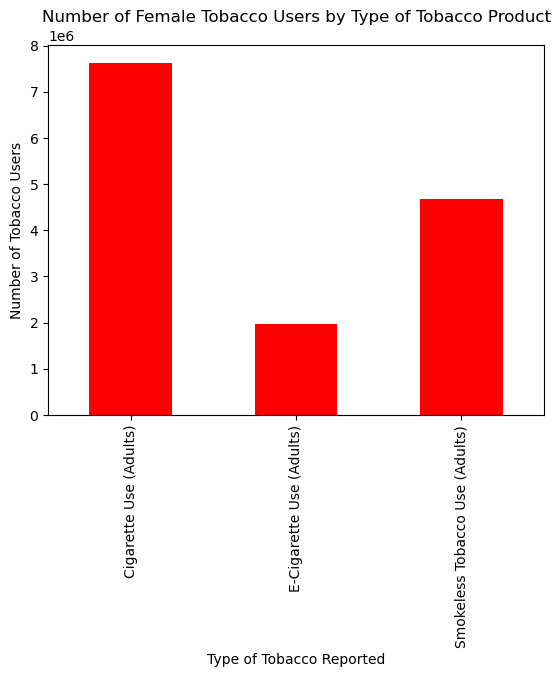

In [19]:
female_count = female_df["Sample_Size"].sum().plot.bar(width=0.5, color="red")
female_count.set_xlabel("Type of Tobacco Reported")
female_count.set_ylabel("Number of Tobacco Users")
female_count.set_title("Number of Female Tobacco Users by Type of Tobacco Product")
plt.xticks(rotation=90)
plt.savefig("output_data/AR_Fig1.png")

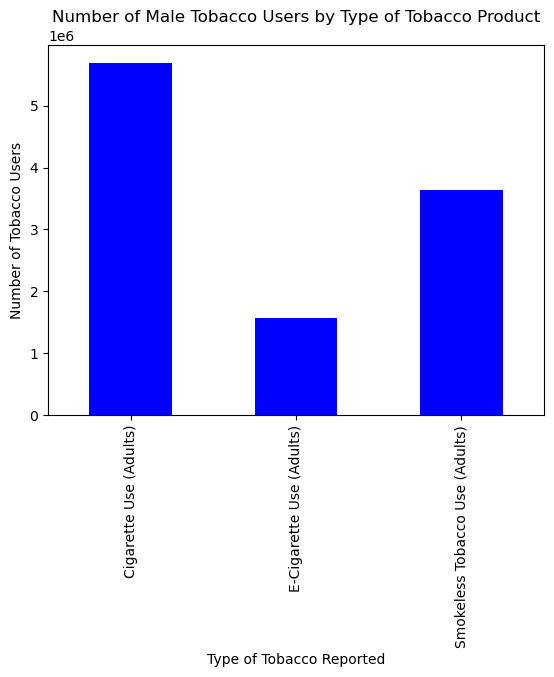

In [13]:
male_count = male_df["Sample_Size"].sum().plot.bar(width=0.5, color="blue")
male_count.set_xlabel("Type of Tobacco Reported")
male_count.set_ylabel("Number of Tobacco Users")
male_count.set_title("Number of Male Tobacco Users by Type of Tobacco Product")
plt.savefig("output_data/AR_Fig2.png")

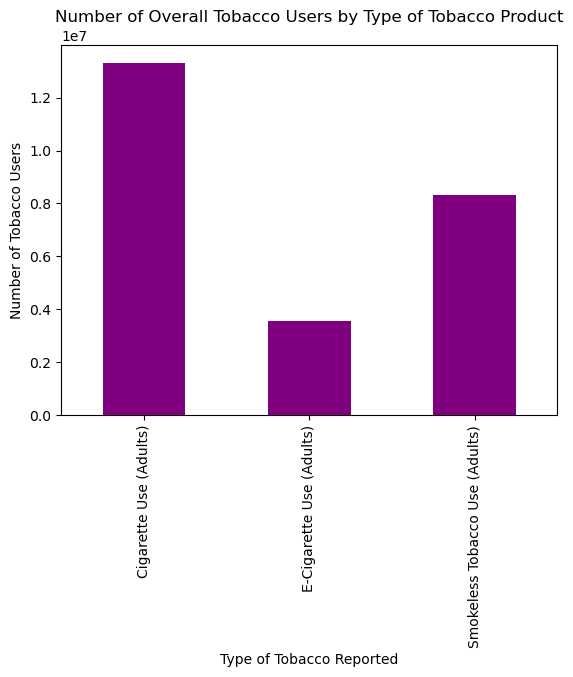

In [14]:
both_count = both_df["Sample_Size"].sum().plot.bar(width=0.5, color = "purple")
both_count.set_xlabel("Type of Tobacco Reported")
both_count.set_ylabel("Number of Tobacco Users")
both_count.set_title("Number of Overall Tobacco Users by Type of Tobacco Product")
plt.savefig("output_data/AR_Fig3.png")